In [1]:
import tensorflow as tf

model = tf.keras.models.load_model('best_model.keras')


In [2]:
import pandas as pd
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.transform import resize 


In [3]:
# Load dataset
data = pd.read_csv('ckextended.csv')

# Extract labels and pixel data
labels = data['emotion'].values
pixel_data = data['pixels'].values

In [4]:
# Convert pixel data from space-separated strings to numpy arrays and reshape
image_data = []
for pixels in pixel_data:
    img = np.array(pixels.split(), dtype='uint8')  # Convert to array of integers
    img = img.reshape(48, 48)                      # Reshape to 48x48
    img = np.stack((img,) * 3, axis=-1)           # Convert to RGB (3 channels)
    img = resize(img, (224, 224))                  # Resize to 224x224
    image_data.append(img)
image_data = np.array(image_data)  # Convert list of images to numpy array


In [5]:
# Load the Keras model
model = tf.keras.models.load_model('best_model.keras')

# Define preprocessing and prediction functions
def preprocess_image(image):
    return image / 255.0

def predict_fn(images):
    processed_images = np.array([preprocess_image(img) for img in images])
    return model.predict(processed_images[..., np.newaxis])  

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

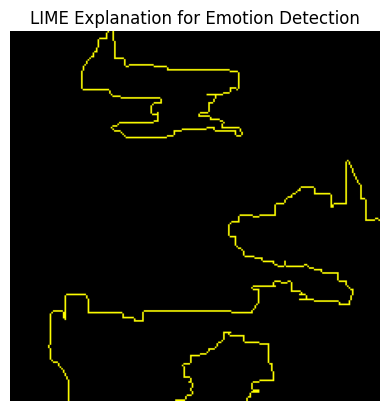

In [6]:
# Initialize the LIME explainer
explainer = lime_image.LimeImageExplainer()

# Select a sample image
sample_index = 0  # Change this to test different images
sample_image = image_data[sample_index]

# Generate explanation
explanation = explainer.explain_instance(
    sample_image, predict_fn, top_labels=1, hide_color=0, num_samples=1000
)

# Visualize the explanation
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("LIME Explanation for Emotion Detection")
plt.axis('off')
plt.show()